<a href="https://colab.research.google.com/github/letruong711/Neural-Networks-and-Pneumonia/blob/main/Pneumonia_and_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import glob
import random

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
[1]*9**10

# Importing data.

#### Followed https://www.youtube.com/watch?v=n4mxwSAWvo8&t=364s&ab_channel=DrJuanKlopper to help import library into Google Collab.

In [2]:
#setting up bridge between collab and drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
\auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
fid = drive.ListFile({'q': "title='archive.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id':fid})
f.GetContentFile('archive.zip')

In [ ]:
#unzip massive file.
!unzip archive.zip

In [6]:
PATH = '/content/chest_xray'

In [7]:
os.listdir(PATH)

['val', '__MACOSX', 'train', 'chest_xray', 'test']

In [8]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
val_dir = os.path.join(PATH, 'val')

In [9]:
#train_normal_dir = os.path.join(train_dir, 'NORMAL')
#train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


#test_normal_dir = os.path.join(test_dir, 'NORMAL')
#test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

# **Preprocessing.**

In [34]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
batch_size = 624

In [11]:
image_gen = ImageDataGenerator()

In [30]:
#set train data
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=5216,
    class_mode='categorical')
train_images, train_labels = next(train_data_gen)

Found 5216 images belonging to 2 classes.


In [31]:
#set test data
test_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')
test_images, test_labels = next(test_data_gen)

Found 624 images belonging to 2 classes.


In [32]:
display(np.shape(train_images))
display(np.shape(train_labels))

print('-----------------')

display(np.shape(test_images))
display(np.shape(test_labels))

(5216, 224, 224, 3)

(5216, 2)

-----------------


(624, 224, 224, 3)

(624, 2)

In [33]:
#unrow to get one vector for MLP to process
train_image_unrow = train_images.reshape(5216,-1)
display(train_image_unrow.shape)

test_image_unrow = test_images.reshape(624,-1)
display(test_image_unrow.shape)

(5216, 150528)

(624, 150528)

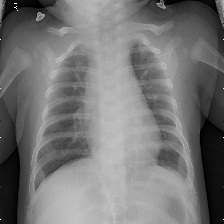

[0. 1.]
--------


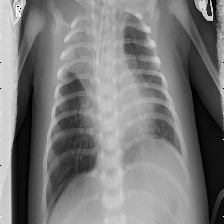

[0. 1.]


In [35]:
display(array_to_img(train_images[2000]))
print(train_labels[2000])
print('--------')
display(array_to_img(test_images[400]))
print(test_labels[400])

In [36]:
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [37]:
test_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [38]:
display(train_data_gen.class_indices)
display(test_data_gen.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}

{'NORMAL': 0, 'PNEUMONIA': 1}

In [39]:
train_labels_final = train_labels[:,1].reshape(-1,1)
display(np.shape(train_labels_final))

test_labels_final = test_labels[:,1].reshape(-1,1)
display(np.shape(test_labels_final))

(5216, 1)

(624, 1)

In [40]:
#normalizing our data
train_image_final = train_image_unrow/255
test_image_final = test_image_unrow/255
display(test_image_unrow.shape)
display(type(train_image_final))

(624, 150528)

numpy.ndarray

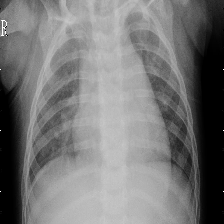

array([1.], dtype=float32)

In [41]:
display(array_to_img(train_images[5000]))
train_labels_final[5000]

# **Multilayer Perceptron.**

In [50]:
model_1 = Sequential()

model_1.add(Dense(32, activation='relu', input_shape=(150528,)))
model_1.add(Dropout(.2))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [53]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [52]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                4816928   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,817,633
Trainable params: 4,817,633
No

In [54]:
display(train_image_final.shape)
display(train_labels_final.shape)
display(test_image_final.shape)
display(test_labels_final.shape)

(5216, 150528)

(5216, 1)

(624, 150528)

(624, 1)

In [57]:
results_1 = model_1.fit(train_image_final,
                        train_labels_final,
                        epochs = 200,
                        batch_size = 50,
                        validation_data=(test_image_final, test_labels_final))

Epoch 1/200
105/105 [==============================] - 3s 26ms/step - loss: 0.3423 - accuracy: 0.8054 - val_loss: 0.4663 - val_accuracy: 0.8141
Epoch 2/200
105/105 [==============================] - 3s 25ms/step - loss: 0.3465 - accuracy: 0.7995 - val_loss: 0.7419 - val_accuracy: 0.7340
Epoch 3/200
105/105 [==============================] - 3s 24ms/step - loss: 0.3252 - accuracy: 0.8184 - val_loss: 0.6990 - val_accuracy: 0.7436
Epoch 4/200
105/105 [==============================] - 3s 25ms/step - loss: 0.3317 - accuracy: 0.8087 - val_loss: 0.5154 - val_accuracy: 0.8013
Epoch 5/200
105/105 [==============================] - 3s 25ms/step - loss: 0.3348 - accuracy: 0.8069 - val_loss: 0.8301 - val_accuracy: 0.7276
Epoch 6/200
105/105 [==============================] - 3s 26ms/step - loss: 0.3420 - accuracy: 0.7947 - val_loss: 1.0833 - val_accuracy: 0.7067
Epoch 7/200
105/105 [==============================] - 3s 24ms/step - loss: 0.3348 - accuracy: 0.8041 - val_loss: 0.4590 - val_accuracy:

# **Visualizing our Loss and Accuracy Curves.**

In [58]:
scores = model_1.evaluate(test_image_final, test_labels_final, verbose=0)
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


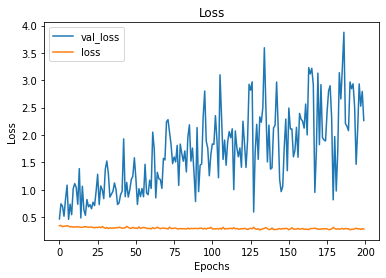

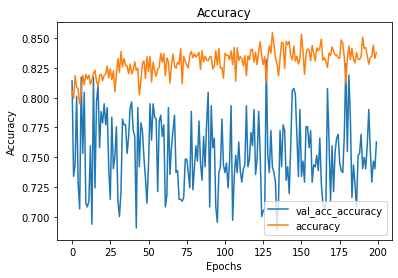

In [59]:
visualize_training_results(results_1)

In [64]:
scores = model_1.evaluate(test_image_final, test_labels_final, verbose=2)
scores

20/20 - 0s - loss: 2.2651 - accuracy: 0.7628 - 165ms/epoch - 8ms/step


[2.265070676803589, 0.7628205418586731]

In [61]:
!mkdir -p saved_model
model_1.save('model_1.h5')
model_1.save_weights('model_weights.h5')

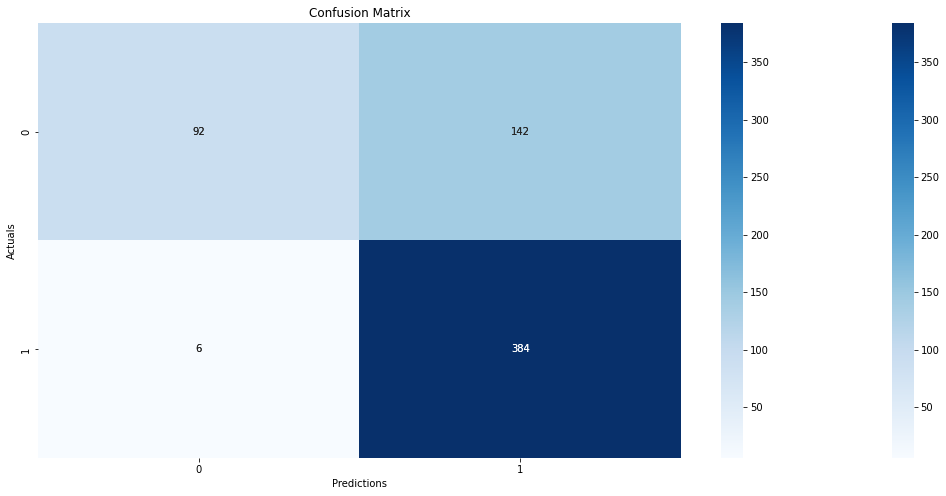

In [62]:
#normal = 0, pneumonia = 1
fig, ax = plt.subplots(figsize=(18, 8))
y_hat_test = model_1.predict(test_image_final)
thresh = 0.5
y_pred = (y_hat_test > thresh).astype(np.int)
y_true = test_labels_final.astype(np.int)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '0.5g')
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '0.5g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55       234
           1       0.73      0.98      0.84       390

    accuracy                           0.76       624
   macro avg       0.83      0.69      0.70       624
weighted avg       0.81      0.76      0.73       624



# **MLP Results**

- Best accuracy the MLP can show is 76%.
- Model overfits. We can see accuracy doesn't improve after 30 epochs.
- Movel can improve with different activation functions, dropouts, and early stoping. 
  - With that being stated. Model tested with .2 dropout and accuracy dropped to 65%. 
